<a href="https://colab.research.google.com/github/avigangarde/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_by_Avinash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



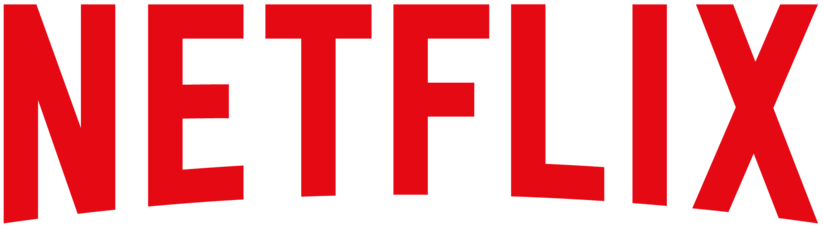

##### **Project Type**    - Unsupervised Machine learning ( Clustering )
##### **Contribution**    - Individual
##### **Team Member 1 -** Avinash B Gangarde ( Data Science Traine At Almabetter)

# **Project Summary -**

The biggest provider of on-demand online streaming media and online DVD movie rentals is Netflix. Marc and Reed founded it on August 29, 1997, in Los Gatos, California. Its 69 million users reside in more than 60 nations and watch more than 100 million hours of TV and videos each day. With access to TV shows, documentaries, and feature films in a broad range of genres and languages, Netflix is the top global provider of online entertainment. These straightforward, engaging, and exciting visualisations were made as a result of my curiosity to analyse the Netflix platform's newly released material in order to identify demographic groups that shared interests.

As of 2019, the Netflix content included in this dataset comprises of TV shows and films. The information was gathered from the independent Netflix search engine Fixable. The number of TV shows available on Netflix has almost tripled since 2010, according to an interesting study that was published in 2018. Since 2010, the number of movies available on the streaming service has dropped by more than 2,000, whereas the number of TV programmes has nearly tripled. Investigating what additional insights can be drawn from the same dataset will be fascinating. Many intriguing results can be obtained by combining this dataset with other external datasets, such as IMDB ratings and rotten tomatoes.

we will follow following steps while doing this project:

First, we will understand the data and the features it contains. Then, we will attempt to visualise the data using various libraries, such as matplotlib and seaborn, in order to better understand the relationships between the features.

In step 2, we will look for null numbers and outliers.

Step 3: To lessen dimensionality, we will attempt to create new features and feature encoding.

Step 4 will involve determining which features are crucial for forming clusters.

In step 5, we'll use techniques like the elbow and Silhoutte methods to determine the optimal number of clusters.

In step 6, we'll move on to unsupervised learning methods like K-means clustering, hierarchical clustering, and content-based clustering.

step-7  we will conclude the project and understand how this information is useful to the stakeholders and how they can use this insights to take decisions .




# **GitHub Link -**

[Netflix Movies and TV Shows Clustering ](https://github.com/avigangarde/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_by_Avinash.ipynb)

# **Problem Statement**


This dataset comprises of Netflix-eligible television shows and movies as of 2019. The information was gathered from the third-party Netflix search engine Flixable. The number of TV shows available on Netflix has almost tripled since 2010, according to an interesting study that was published in 2018. Since 2010, the number of movies available on the streaming service has dropped by more than 2,000, whereas the number of TV programmes has nearly tripled. Investigating what additional insights can be drawn from the same dataset will be fascinating. Many intriguing results can be obtained by combining this dataset with other external datasets, such as IMDB ratings and rotten tomatoes.

#### **Define Your Business Objective?**

Investigating exploratory data ,  understanding the types of content that are accessible in various nations.  In recent years, Netflix has shifted its attention away from film and towards television.
matching text-based features to create clusters of related content.

understanding the platform's user base and the types of content they prefer to consume would allow the company to consider producing content in specific genres. The company wants to serve new users who join their platform as well as keep their current users happy. Understanding the user and the content they choose enables a business to retain customers, attract new users, and, ultimately, expand.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Mount the google drive on colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# reading the file 
df=pd.read_csv('/content/drive/MyDrive/ML capstone csv /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f'No of duplicate rows in  dataset is {df.duplicated().sum()}')

No of duplicate rows in  dataset is 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

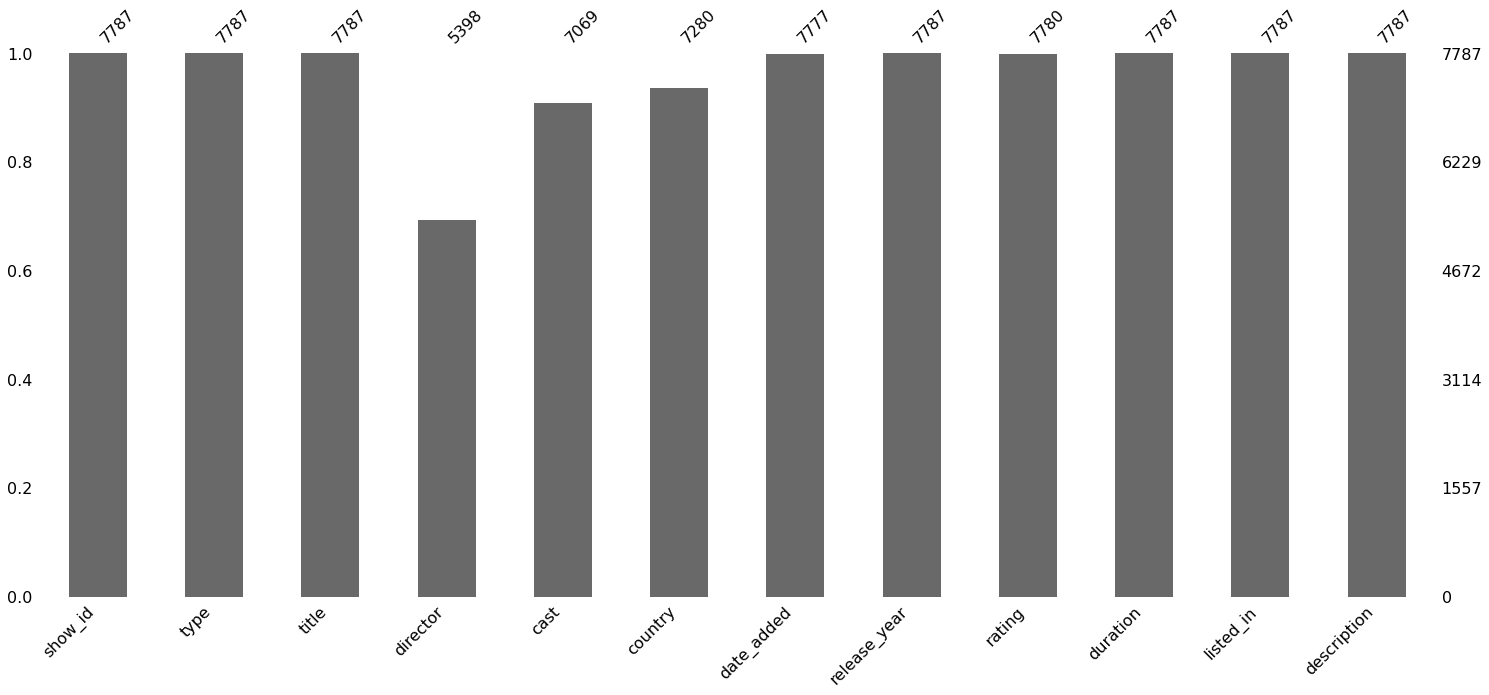

In [9]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

1] Dataset has 7787 Rows and 12 columns .

2] released year is the only column having numerical data , remaining have object type of data.

3] This are some columns have null values present such as director column has 2389 null values  ,cast column has 718 null values ,country  column has 507 null values and date_added column has 10 null values.

4] There are ) duplicate rows present insie the dataset.




## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [12]:
# take a look at dataset to understand data contain in columns
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


### Variables Description 

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")   

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# see the null values in the columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
#total null values
df.isnull().sum().sum()

3631

In [16]:
# Write your code to make your dataset analysis ready.
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [17]:
df['rating'].mode()[0]

'TV-MA'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


# 4.  **feature endcoding**

In [19]:
#  ltes see the Top most countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [20]:
# lets see the Top most Genre of shows 
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [21]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [22]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [23]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [24]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [25]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...


In [26]:
df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [27]:
# lets see the duration of TV shows having maximum duration
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [28]:
# Movie length in minutes
df[df['type']=='Movie'].duration.sort_values(ascending=False)

957     312
6850    253
4490    237
3694    233
5108    230
       ... 
463      10
1203      9
1501      8
5694      5
5605      3
Name: duration, Length: 5377, dtype: int64

In [29]:
# Typecasting 'date_added' from string to datetime
df['date_added '] = pd.to_datetime(df['date_added'])

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [31]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [32]:
# Adding new features month and year of date added and dropping the date_added column

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)
     

In [33]:
df.shape

(7777, 14)

In [34]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   int64         
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  date_added    7777 non-null   datetime64[ns]
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 911.4+ KB


### What all manipulations have you done and insights you found?

1] We have replace the NaN values in the 'director','cast','country' column by the unknown values

2] We also replaced the  NaN values in the rating column by the mode 'TV-MA'

3] In the country and genre column we have selected all the primary country and primary genre in the given columns.

4] Then we have converted duration column in the integer format.

5] We did extraction of Year and month from the date_added column and   added them as new column.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

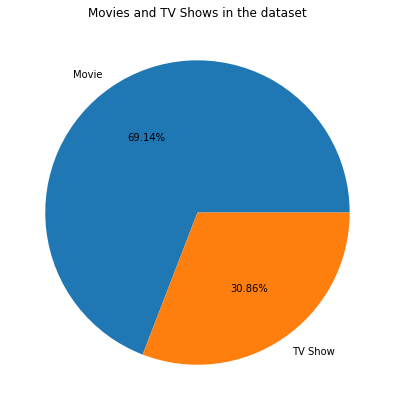

In [35]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

1] I have chosen the pie chart as pie chart simplest way easiest way to show distribution of values .

2] we have a data of 69.14 % are movies and 30.86 % are TV shows

#### Chart - 2

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

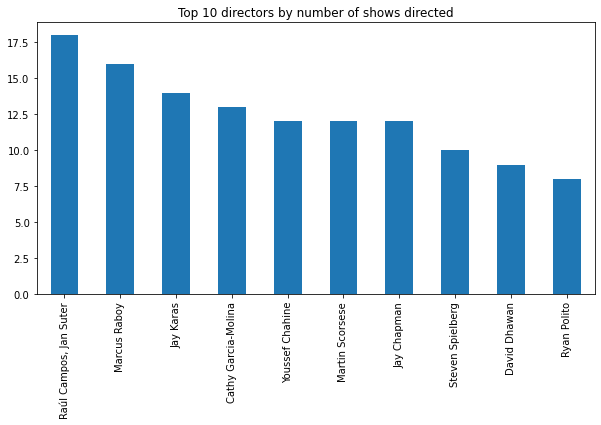

In [36]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')   

1] Bar chart is easy way show numbers with comparison.

2] We can  see that Raul campose , jan suter , Marcus raboy , jay karas are top directors who have done most number of movies.

#### Chart - 3

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

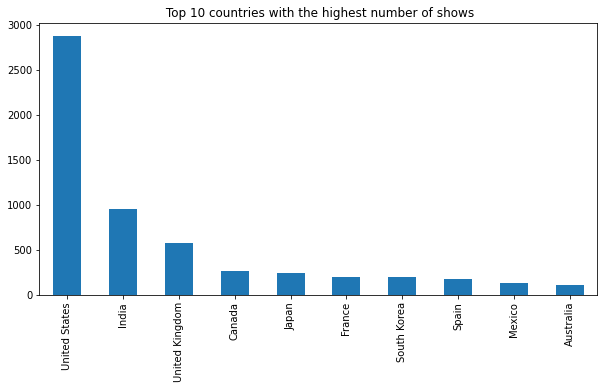

In [37]:
# Chart - 3 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')  

In [38]:
# % share of movies / tv shows by top 3 countries
print(f'percentage of share of top 3 countries is {df.country.value_counts().nlargest(3).sum()/len(df)*100}')
print(f'percentage of share of top  10 countries is {df.country.value_counts().nlargest(10).sum()/len(df)*100}')

percentage of share of top 3 countries is 56.69281213835669
percentage of share of top  10 countries is 78.32068921177832


1] Bar chart is simple way to analyse values with comparison.

2] we can see united states is the top most country for the where most of shows are produced ,there are 3 countries US , India , UK have produced 56.62 % shows and remaining shows are produced by rest of the country.

#### Chart - 4

Text(0.5, 1.0, 'distribution by released year')

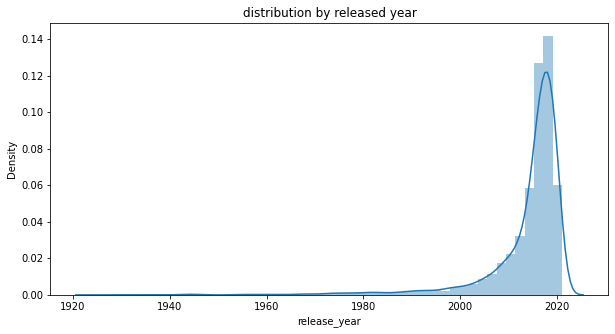

In [39]:
# Chart - 4 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.distplot(df['release_year'])
plt.title('distribution by released year')

1] Distribution plot will helps us analyse the distriution of values.

2] We can see that the after year 2000 the there are more number of shows produced continuesly.

#### Chart - 5

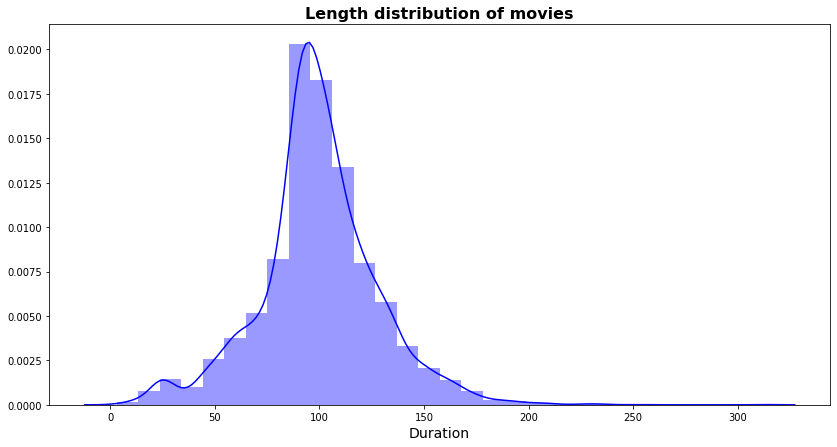

In [40]:
# Chart - 5 visualization code
# Length distribution of movies
movie_df = df[df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()
     

1] Distribution plot helps us to analyse the density of values.

2] We can see that the most of the movies have average duration between the 80 min to 120 min.

#### Chart - 6

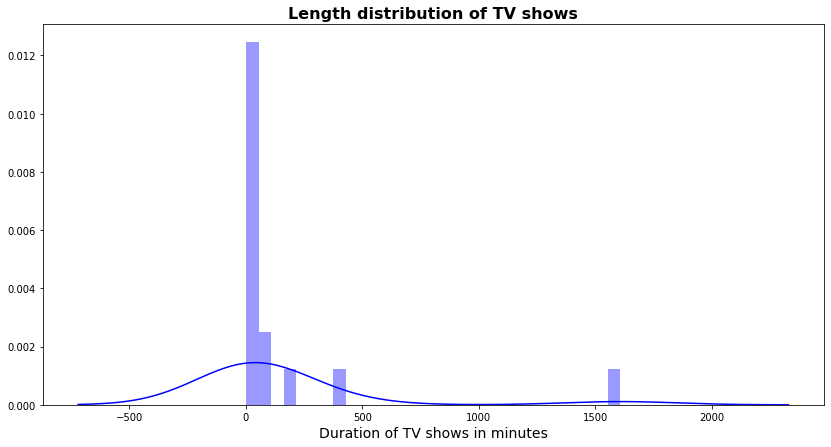

In [41]:
# Chart - 6 visualization code
# Length distribution of TV shows 
df[df['type']=='TV Show'].duration.value_counts()
plt.figure(figsize=(14, 7))

sns.distplot(df[df['type']=='TV Show'].duration.value_counts()
, bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of TV shows', fontsize=16,fontweight="bold")
plt.xlabel('Duration of TV shows in minutes', fontsize=14)
plt.show()
     

1] Through the distribution plot we could understand the distribution of values in the column.

2] we can values of duration of TV sows are inconsitent and vary drastically.

#### Chart - 7

<Axes: xlabel='rating', ylabel='count'>

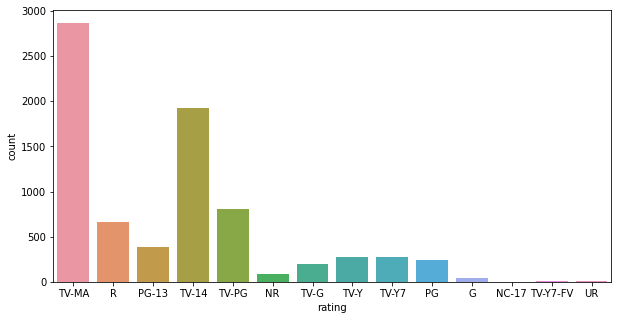

In [42]:
# Chart - 7 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [43]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [44]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].value_counts()[:11].index

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Canada',
       'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

In [45]:
country_order = df['principal_country'].value_counts()[:11].index
country_order

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Canada',
       'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

In [46]:
# creating the dataframe of top countries and there shows count.
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data

type,Movie,TV Show
United States,2100.0,777.0
India,883.0,73.0
United Kingdom,341.0,235.0
Unknown,230.0,276.0
Canada,175.0,84.0
Japan,75.0,161.0
France,137.0,59.0
South Korea,42.0,152.0
Spain,119.0,49.0
Mexico,79.0,44.0


In [47]:
# take a look at the dataframe
content_data['sum'] = content_data.sum(axis=1)
content_data

type,Movie,TV Show,sum
United States,2100.0,777.0,2877.0
India,883.0,73.0,956.0
United Kingdom,341.0,235.0,576.0
Unknown,230.0,276.0,506.0
Canada,175.0,84.0,259.0
Japan,75.0,161.0,236.0
France,137.0,59.0,196.0
South Korea,42.0,152.0,194.0
Spain,119.0,49.0,168.0
Mexico,79.0,44.0,123.0


In [48]:
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1] = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
content_data_ratio

type,Movie,TV Show
South Korea,0.216495,0.783505
Japan,0.317797,0.682203
Unknown,0.454545,0.545455
Australia,0.523364,0.476636
United Kingdom,0.592014,0.407986
Mexico,0.642276,0.357724
Canada,0.675676,0.324324
France,0.698980,0.301020
Spain,0.708333,0.291667
United States,0.729927,0.270073


In [49]:
# df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
# df['principal_country'].head()

# country_order = df['principal_country'].value_counts()[:11].index
# content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
# content_data['sum'] = content_data.sum(axis=1)
# content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [50]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']
data

0     United States
1             India
2    United Kingdom
3           Unknown
4            Canada
5             Japan
6            France
7       South Korea
8             Spain
9            Mexico
Name: principal_country, dtype: object

In [51]:
Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]

In [52]:
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T

In [53]:
Flix_df_heatmap

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775


In [54]:
# df['count'] = 1
# data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
# data = data['principal_country']

# Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
# Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
# Flix_df_heatmap

1] We can see that the most of shows for adults, kids , teens , older kids , teens  and young adults and there proudction % for the top 10 countries.

#### Chart - 8

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

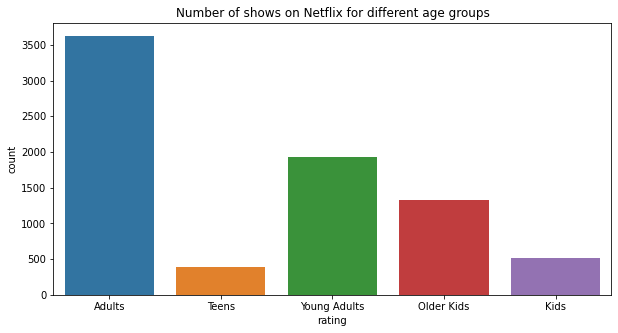

In [55]:
# Chart - 8 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.title('Number of shows on Netflix for different age groups')

1] Most number of shows given in the data are for the adults , then followed by the young adults , older kids, kids and teens.

1]countplot() method is used to Show the counts of observations in each categorical bin using bars.

2] Most number of shows given in the data are for the adults , then followed by the young adults , older kids, kids and teens.

3] In this count plot we found that Number of shows on Netflix for different age groups and Adults are the highest number of shows and second highest is Young Adults and third highest is older Kids shows.

#### Chart - 9

Text(0.5, 1.0, 'Top 10 genres')

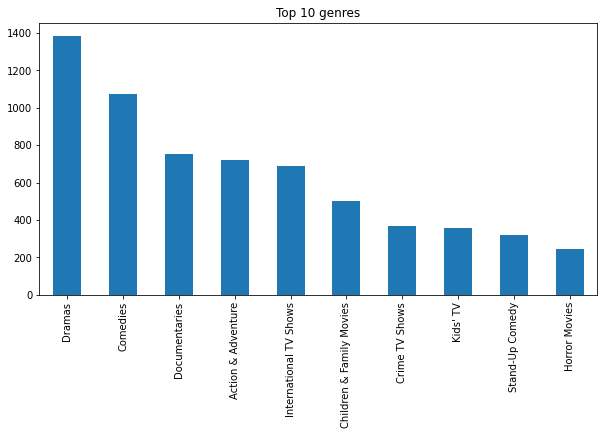

In [56]:
# Chart - 9 visualization code
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

1] A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it.  Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart. 

2] In this  bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

3]From the above graph we can see that top genres of the netflix are drama,comedies, documentries,Action and adventure.etc.


#### Chart - 10

In [ ]:
df.head()

Text(0.5, 0, '')

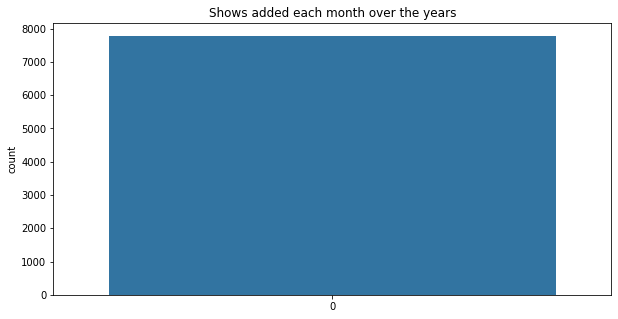

In [57]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')
     

1] in this count plot we found Number of shows added on different months.

2] December are the highest number of shows added on and Octobor are the second highest number of shows added on. we see all month minority difference between them.

#### Chart - 11

Text(0.5, 0, '')

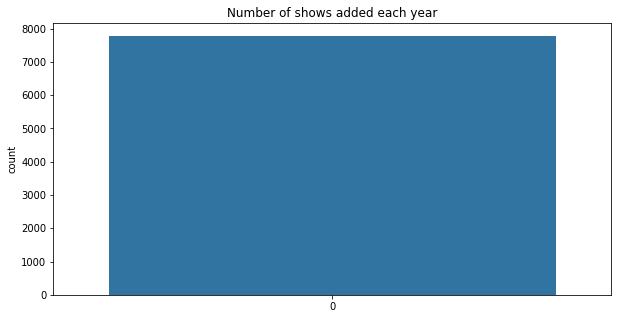

In [58]:
# Number of shows added over the years
plt.figure(figsize = (10,5)) 
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

1] in this count plot we found Number of shows added on each different years.

2] 2019 are the highest number of shows added on and 2020 are the second highest number of shows added on and 2018 are the third highest number of shows added on.

#### Chart - 12 Bivariate Analysis

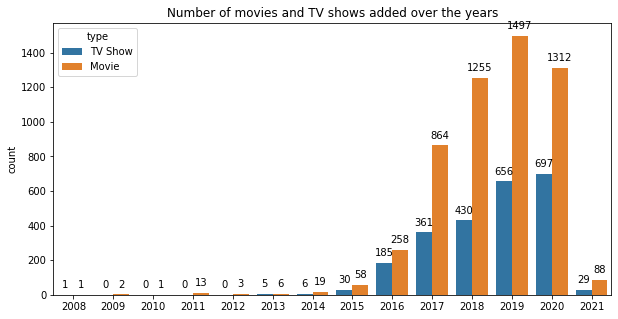

In [59]:
# Chart - 12 visualization code
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

1] A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

2] In this graph we found that Number of movies and TV shows added over the years.2019 are the 1497 movies and 656 TV shows are there. 2020 year 1312 movies and 697 TV shows are there and 2018 year 1255 movies and 430 TV shows are there.




#### Chart - 13

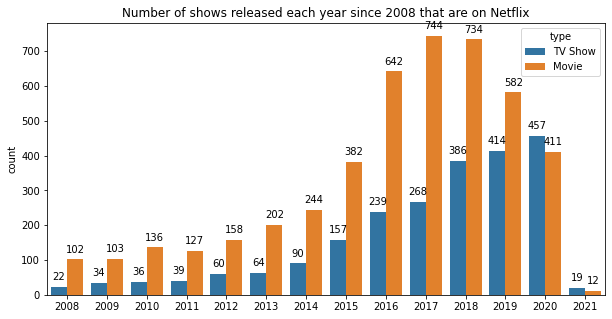

In [60]:
# Chart - 13 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     


1]. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

2]. In this graph we found that Number of shows released each year since 2008 that are on Netflix.see this graph Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.

#### Chart - 14 - Correlation Heatmap

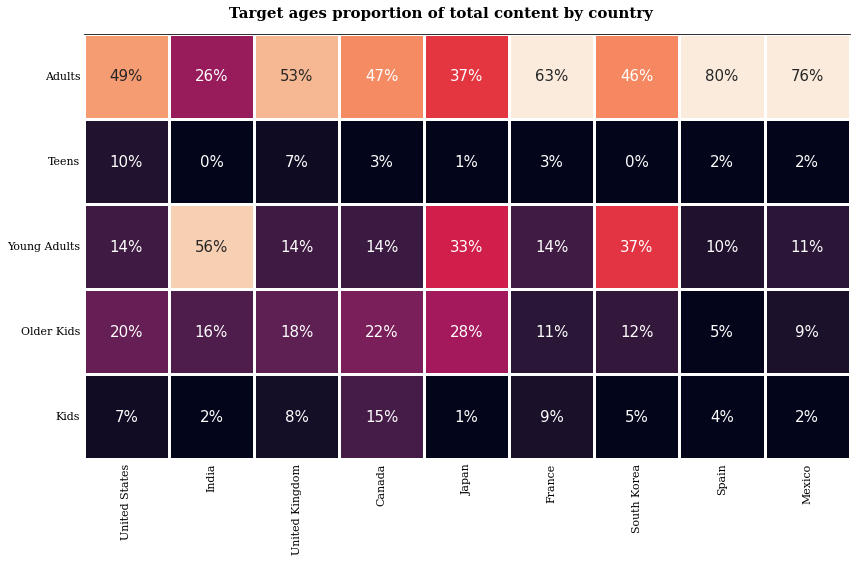

In [61]:
# Correlation Heatmap visualization code
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()
     


1] A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

2] Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap.

3]. In this correlation Heatmap graph we found the Target ages proportion of total content by country.

#### Chart - 15 - Word cloud 

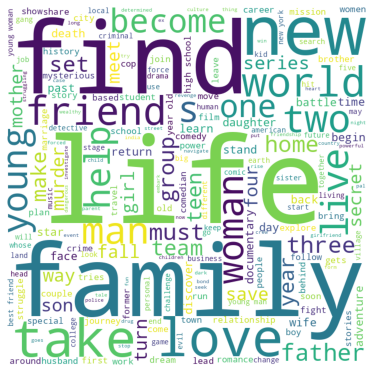

In [62]:
#  visualization code
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
     


1] Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

2] In this graph we found life,family,love,friend,world,new,find words are many time uses.

# **Data processing :**

In [63]:
# Using the original dataset for clustering since
# it does not require handling missing values
Dataset = df.copy()

In [64]:
Dataset.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,principal_country,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Brazil,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Mexico,1


In [65]:
Dataset.fillna('',inplace=True)

In [66]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' + 
                                Dataset['cast'] +' ' + 
                                Dataset['country'] +' ' + 
                                Dataset['listed_in'] +' ' + 
                                Dataset['description'])

In [67]:
# Select the number of clusters for the dataset 
Dataset['clustering'][100]     

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **Removing punctuation**

In [68]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [69]:
# Removing punctuation marks
Dataset['clustering'] = Dataset['clustering'].apply(remove_punctuation)  

In [70]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing Non-ASCII characters** (the American Standard Code for Information Interchange).

In [71]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [72]:
# remove non-ascii characters
Dataset['clustering'] = remove_non_ascii(Dataset['clustering'])
     

In [73]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]


'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing Stopwards**

In [74]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [75]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)
     

In [76]:
# Removing stop words
Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [77]:
# Select the 100 number of clusters for the dataset 
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Lemmatisation :**

In [78]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
     


In [79]:
# Lemmatization
Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])

In [80]:
# Select the 100 number of clusters for the dataset 
print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization :**

In [81]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [82]:
# Create text column based on dataset
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))
     

In [83]:
# Select the 100 number of Tokenization for the dataset 
print(Dataset['clustering'][100])    

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Vectorization :**

In [84]:
# clustering tokens saved in a variable
clustering_vectorization = Dataset['clustering']

In [85]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [86]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [87]:
# convert X into array form for clustering
X = x.toarray()

In [88]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Reduceing Diemensionality using PCA**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')    

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)    

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape   

# **Unservised Machine Learning clustering algorithms implementation**

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))
     

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


In [ ]:
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **2.Hierarchical clustering:**

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)   

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

In [ ]:
  # plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
     

# **3.Content based recommender system**

In [ ]:
# Changing the index of the df from show id to show title
Dataset['show_id'] = Dataset.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))
     

In [ ]:
# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
Dataset_10('A Man Called God')

In [ ]:
# Recommendations for 'Peaky Blinders'
Dataset_10('Peaky Blinders')

In [ ]:
# Recommendations for 'Stranger Things'
Dataset_10('Stranger Things')

## **5. Solution to Business Objective**

1] We have seen that the more number of people are intertesd in the TV shows over the period of time and is increasing .Netflix must considerd this and decide the content strategy for platform.

2]  We also have seen that more number of shows are produced for adults. netflix should try other countries adults with similar intrest and like of shows.

3] Netflix should keep Analyzing the trend of users choices so they could produced content related that and could able to produced content around that.

4] Netflix can also find other platforms users choices so they could attract them and increase more user base.

# **Conclusion**

1]For this project, we tackled a text clustering issue that required us to sort the Netflix shows into distinct clusters based on how much they resembled  to each another and how little they resembled to another 

2]The dataset had 12 features and about 7787 rows. We started by addressing the absent values in the dataset and performing exploratory data analysis. (EDA)

3] The total number of TV programs introduced to Netflix is increasing exponentially, and Netflix hosts more movies than TV series on its website. Additionally, the majority of Netflix's TV programs were developed for adults and young adults and were produced in the United States.

4].After receiving the necessary information from the EDA, we begin by pre-processing the text data by eliminating stop words and punctuation. Since we are performing a text-based clustering and the model requires the data to be vectorized in order to predict the intended outcomes, the filtered data is passed through TF - IDF Vectorizer.

5]Based on the features director, actors, country, genre, and description, it was determined to cluster the data. These features values went through tokenization, preprocessing, and vectorization using TFIDF vectorize.

6.A total of 20000 features were produced using TFIDF vectorization. For the purpose of overcoming the multidimensional problem, we used Principal Component Analysis (PCA). The number of components was limited to 4000 because they could account for more than 80% of the variance. The ideal number of clusters was found to be six when we first constructed clusters using the k-means clustering method. The elbow technique and Silhouette score analysis were used to get this result.

7]After that, clusters were created using the agglomerative clustering algorithm, and 12 clusters were determined to be the ideal amount. The dendrogram was visualized for obtaining this.





